In [13]:
import FisherGillespie
using Plots
using Polynomials

In [14]:
# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1

# Initial state.
ψ0_A = complex(float([1 ; 0]))
ψ0_B = complex(float([1 ; 0]))
ψ0 = kron(ψ0_A, ψ0_B)

# Simulation parameters.
t_final = 50.
dt = 0.01
dω = 0.01
number_trajectories = 1000
n_t_initial_fit = Int(floor(30. / dt))

# g-exploration parameters.
g_range = 0:0.1:1;

# Vector for the slopes.
v_slopes = []

Any[]

Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


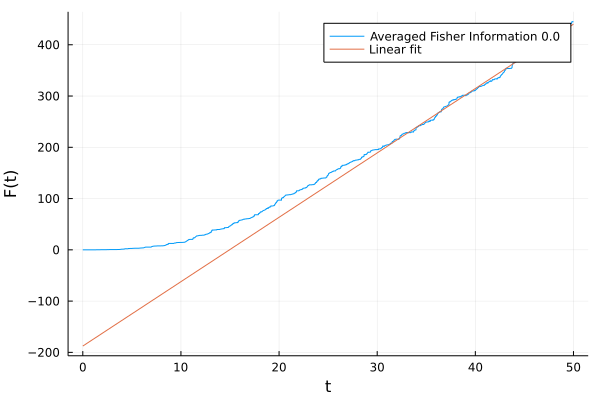

====>>>> THIS FOR g = 0.0
-> Truncation error given by norm of latest Qs matrix: 0.011656836038551036

Found slope of 12.558231739679897



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


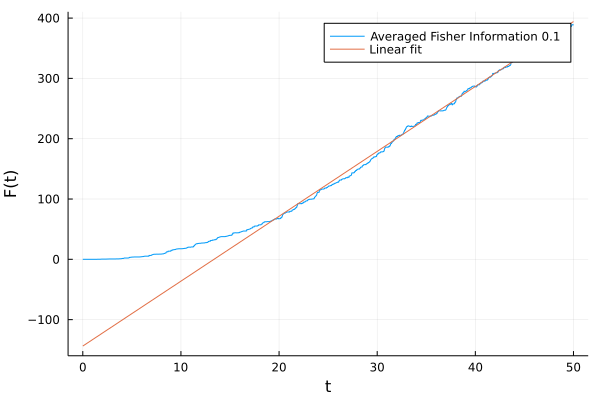

====>>>> THIS FOR g = 0.1
-> Truncation error given by norm of latest Qs matrix: 0.01199907362700731

Found slope of 10.762127313220347



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


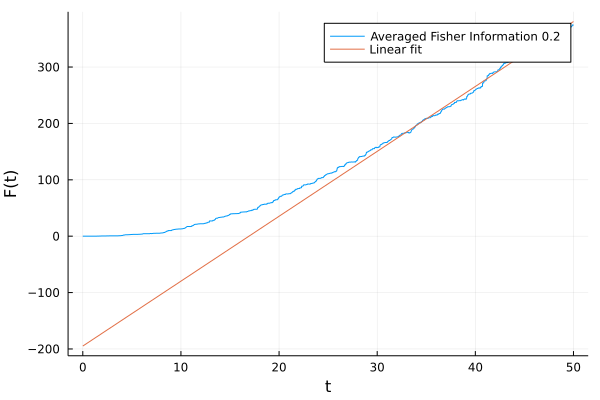

====>>>> THIS FOR g = 0.2
-> Truncation error given by norm of latest Qs matrix: 0.012693689410555061

Found slope of 11.511640297935118



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


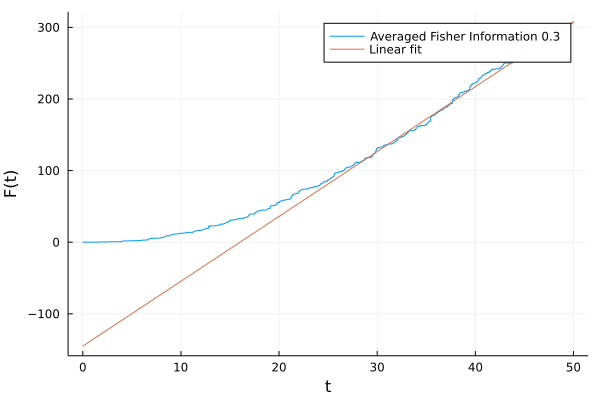

====>>>> THIS FOR g = 0.3
-> Truncation error given by norm of latest Qs matrix: 0.013270963008160516

Found slope of 9.05471515627515



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


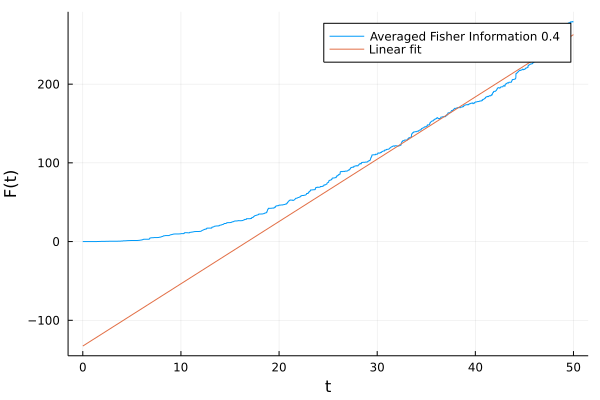

====>>>> THIS FOR g = 0.4
-> Truncation error given by norm of latest Qs matrix: 0.013797640089537619

Found slope of 7.913088406519826



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


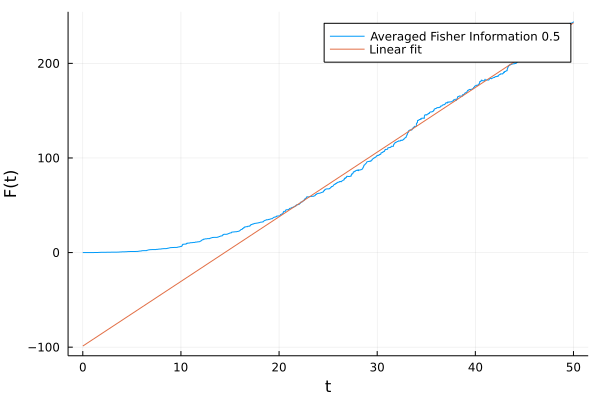

====>>>> THIS FOR g = 0.5
-> Truncation error given by norm of latest Qs matrix: 0.01430581045528546

Found slope of 6.8340699834630545



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


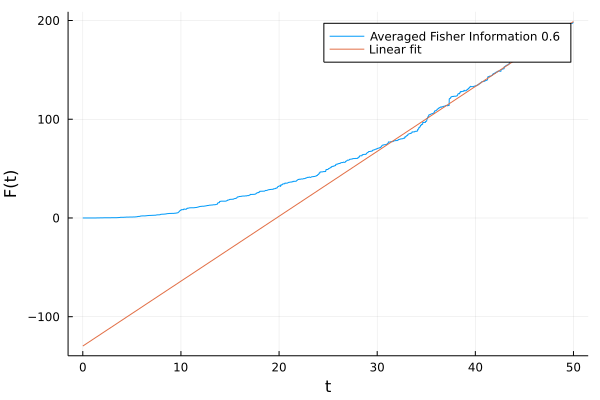

====>>>> THIS FOR g = 0.6
-> Truncation error given by norm of latest Qs matrix: 0.014429690725585491

Found slope of 6.573641068506831



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:09


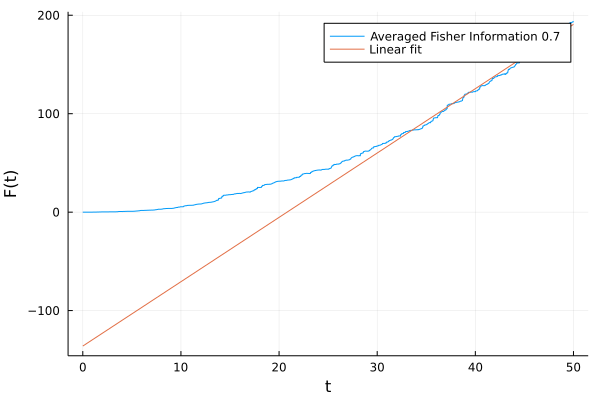

====>>>> THIS FOR g = 0.7
-> Truncation error given by norm of latest Qs matrix: 0.014769206524749195

Found slope of 6.536160510466242



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


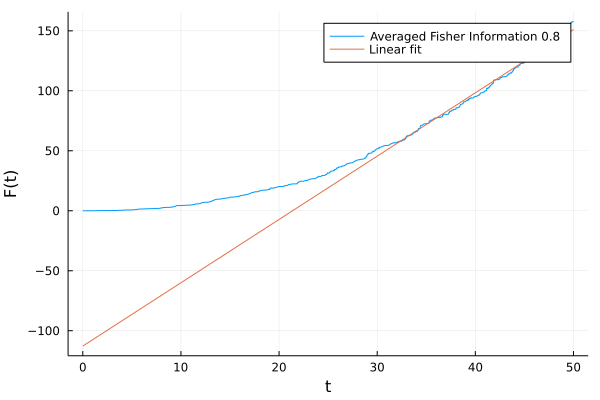

====>>>> THIS FOR g = 0.8
-> Truncation error given by norm of latest Qs matrix: 0.014958718714283259

Found slope of 5.277078939808347



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


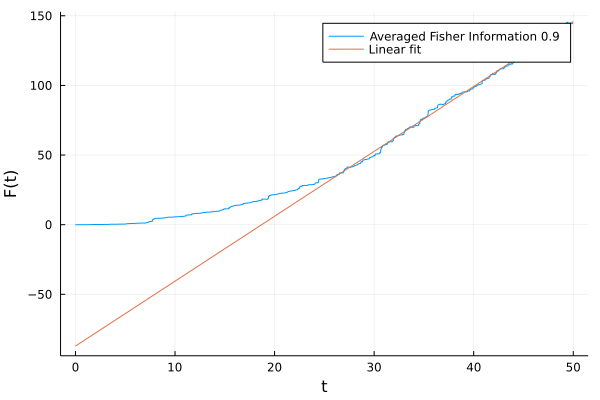

====>>>> THIS FOR g = 0.9
-> Truncation error given by norm of latest Qs matrix: 0.014920769701463736

Found slope of 4.66037915290948



Fisher-Gillespie evolution... 100%|██████████████████████| Time: 0:00:01
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:08


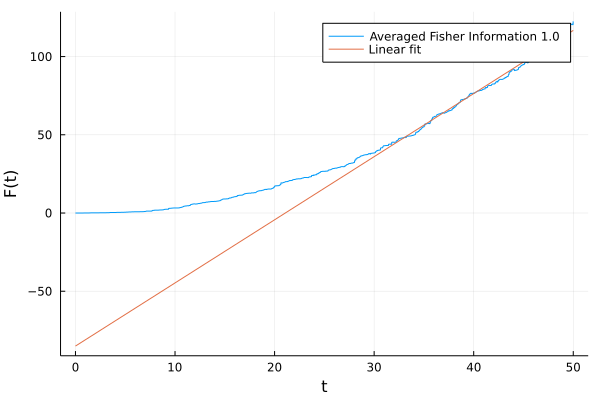

====>>>> THIS FOR g = 1.0
-> Truncation error given by norm of latest Qs matrix: 0.015324004935700034

Found slope of 4.036092693265251



In [15]:
for g in g_range
    flush(stdout)
    println("====>>>> THIS FOR g = " * string(g))
    
    # Operators.
    σ = complex(float([0 1 ; 0 0]))
    σz = complex(float([1 0 ; 0 -1]))
    ide = complex(float([1 0 ; 0 1]))
    σx = σ + σ'
    # Tensorized versions.
    σ_A = kron(σ, ide)
    σ_B = kron(ide, σ)
    σx_A = kron(σx, ide)
    σx_B = kron(ide, σx)
    σz_A = kron(σz, ide)
    σz_B = kron(ide, σz)

    # Hamiltonian.
    H = ωA * σz_A + ωB * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)
    # Displaced versions.
    Hp = ωA * σz_A + (ωB + dω) * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)
    Hm = ωA * σz_A + (ωB - dω) * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)

    # Jump operator.
    M = sqrt(γ) * σ_B
    # The jump operator does not depend on the parameter.
    Mp = M
    Mm = M

    # The jump operators have to be passed as lists.
    M_l = [M]
    Mp_l = [Mp]
    Mm_l = [Mm];
    
    # Launches the Gillespie-Fisher simulation.
    t_range, fisher_information = FisherGillespie.compute_fisher_information(H, Hp, Hm, M_l, Mp_l, Mm_l, dω, ψ0, t_final, dt, number_trajectories, false)

    plot(t_range, fisher_information, label="Averaged Fisher Information " * string(g), xlabel="t", ylabel="F(t)")
    
    linear_fit = Polynomials.fit(t_range[n_t_initial_fit:end], fisher_information[n_t_initial_fit:end], 1)
    display(plot!(linear_fit, t_range[1], t_range[end],label="Linear fit"))
    slope = linear_fit[1]
    println("Found slope of " * string(slope))
    println()
    push!(v_slopes, slope)
end